### Проект № 6 "Выбираем авто выгодно"

**Команда: DSPR-28**  
Проект выполнили: *Юлия Гиль, Григорьева Людмила*

### Ноутбук № 1 для парсинга данных по автомашинам с сайта auto.ru, используемого с целью получения обущающего датасета для построения модели предсказания стоимости автомобиля

### Laptop No. 1 for parsing data on cars from the site auto.ru, used to obtain a general dataset for building a model for predicting the value of a car

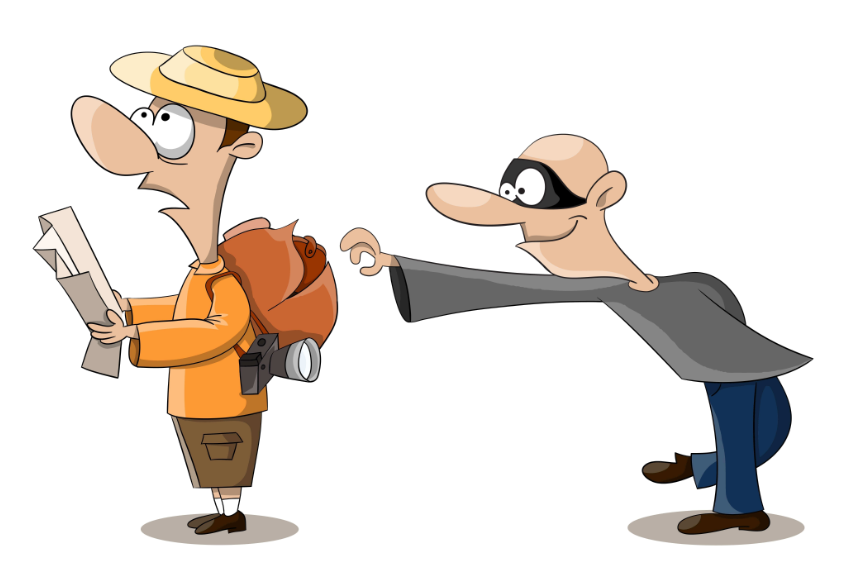

Напишем скрипт, который будет собирать данные по машинам с сайта auto.ru    
Parsing data on machines from the site auto.ru


In [ ]:
# загружаем необходимые библиотеки для получения и обработки данных
# load the necessary libraries for receiving and processing data
import requests
from bs4 import BeautifulSoup
import csv
import time
import json
import re
import pandas as pd
# использовалась при работе в Colabe Notebooks
# used when working at Colabe Notebooks
from google.colab import drive

Процесс парсинга данных с сайта был разделен на 2 этапа. На первом этапе с сайта собирались в отдельный файл ссылки со страниц на объявления по продаже автомобилей. На втором этапе переходили по полученным ссылкам и собирали данные об автомобиле из объявления. 

#### I этап. Сбор ссылок на объявления
#### Stage I. Collecting links to ads

На этом этапе ссылки на объявления собирались по 12 маркам автомобилей, имеющимся в тестовом датасете.    
At this stage, links to ads were collected for 12 car brands available in the test dataset

Для получения достаточного объема записей для обучающего датасета данные собирались не только по Москве, но и по всем регионам.  
To obtain a sufficient volume of records for the training dataset, data was collected not only in Moscow, but also in all regions.

In [ ]:
# использовалась при работе в Colabe Notebooks
# used when working at Colabe Notebooks
drive.mount('/drive')


def get_all_links(url_list):
    '''
    Функция для получения и сохранения в отдельный файл ссылок на объявления
    по машинам выбранных марок. В результате выполнения получаем файл со 
    списком найденных ссылок.
    Function for receiving and saving in a separate file links 
    to advertisements for cars of selected brands. As a result of execution,
    we get a file with a list of found links.
    '''

    all_car = []
    # проходимся по каждой выбранной марке
    # we go through each selected brand
    for url in url_list:
        # получаем количество страниц по выбранной марке
        # get the number of pages for the selected brand
        print(url)
        res = requests.get(url)
        soup = BeautifulSoup(res.content.decode('utf-8'), 'html.parser')
        news_blocks = soup.find('button',
                                class_='Button Button_color_blue Button_size_m Button_type_button Button_width_full')\
            .find('span', class_='ButtonWithLoader__content').text
        page_total = news_blocks.replace(u'\xa0', u' ').split()[1:3]
        page_total = int(''.join(page_total))
        # 38 ads on one page, get the number of pages
        number_of_pages = int(page_total / 38)

        # получаем и сохраняем ссылки по каждой машине из выбранной марки
        # get and save links for each car from the selected brand
        for i in range(1, number_of_pages):
            print('Current Page:', i, 'Total Pages:', number_of_pages)
            url_page = url + '/?page=' + str(i)
            res = requests.get(url)
            # задержка времени при отправке запросов/time delay when sending requests
            time.sleep(0.1)
            soup = BeautifulSoup(res.content.decode('utf-8'), 'html.parser')
            car_page = soup.find_all('a', class_='Link ListingItemTitle__link')
            car_list = list(map(lambda x: x.get('href'), car_page))
            for row in car_list:
                all_car.append(row)
    # записываем новую ссылку на объявление в файл
    # write the new link to the ad to a file
    with open('/drive/My Drive/all_car_27082021.csv', 'a') as myfile:
        wr = csv.writer(myfile)
        for row in all_car:
            wr.writerow([row])
    return all_car


# определяем список марок машин, которые нам интересны
# we define a list of car brands that are of interest to us
brands = ['honda', 'skoda', 'audi', 'volvo', 'bmw', 'nissan', 'infiniti',
          'mercedes', 'toyota', 'lexus', 'volkswagen', 'mitsubishi']
#url_list = ['https://auto.ru/moskva/cars/'+brand+'/all' for brand in brands]

url_list = ['https://auto.ru/cars/'+brand+'/all' for brand in brands]
all_car = get_all_links(url_list)
print(f'Количество отобранных объявлений: {len(all_car)}')

Mounted at /drive
https://auto.ru/cars/honda/all
Current Page: 1 Total Pages: 127
Current Page: 2 Total Pages: 127
Current Page: 3 Total Pages: 127
Current Page: 4 Total Pages: 127
Current Page: 5 Total Pages: 127
Current Page: 6 Total Pages: 127
Current Page: 7 Total Pages: 127
Current Page: 8 Total Pages: 127
Current Page: 9 Total Pages: 127
Current Page: 10 Total Pages: 127
Current Page: 11 Total Pages: 127
Current Page: 12 Total Pages: 127
Current Page: 13 Total Pages: 127
Current Page: 14 Total Pages: 127
Current Page: 15 Total Pages: 127
Current Page: 16 Total Pages: 127
Current Page: 17 Total Pages: 127
Current Page: 18 Total Pages: 127
Current Page: 19 Total Pages: 127
Current Page: 20 Total Pages: 127
Current Page: 21 Total Pages: 127
Current Page: 22 Total Pages: 127
Current Page: 23 Total Pages: 127
Current Page: 24 Total Pages: 127
Current Page: 25 Total Pages: 127
Current Page: 26 Total Pages: 127
Current Page: 27 Total Pages: 127
Current Page: 28 Total Pages: 127
Current 

In [ ]:
# проверка полученного файла с данными по ссылкам
# checking the received file with data by links
df = pd.read_csv('/drive/My Drive/all_car_27082021.csv', sep=',', header=None)
df

,0
0,https://auto.ru/cars/used/sale/honda/cr_v/1104...
1,https://auto.ru/cars/used/sale/honda/stepwagon...
2,https://auto.ru/cars/used/sale/honda/odyssey/1...
3,https://auto.ru/cars/used/sale/honda/fit/11049...
4,https://auto.ru/cars/used/sale/honda/vezel/110...
...,...
137554,https://auto.ru/cars/used/sale/mitsubishi/asx/...
137555,https://auto.ru/cars/used/sale/mitsubishi/asx/...
137556,https://auto.ru/cars/used/sale/mitsubishi/gran...
137557,https://auto.ru/cars/used/sale/mitsubishi/outl...


#### II этап. Получение данных о продаваемом автомобиле из объявления
#### Stage II. Retrieving data about a sold car from an ad

На данном этапе данные по машинам из-за их большого объема собирались частями с использованием 5 Colabe Notebooks и 2-х ноутбуков в jupyter. Для этого в начале файл с полученными ссылками разбивался на несколько файлов размером по 10000 строк с использованием следующего кода:     
At this stage, data on machines, due to their large volume, were collected in parts using 5 Colabe Notebooks and 2 notebooks in jupyter. To do this, at the beginning, the file with the resulting links was split into several files of 10,000 lines each using the following code:

In [ ]:
df = pd.read_csv('/drive/My Drive/all_car_27082021.csv', sep=',', header=None)
df_list = df[0].tolist()
k = len(df_list)
l = 0
r = 10000
for i in range(0, k, 10000):
    l = i
    r = i + 10000
    print(i, l, r)
    if r < k:
        with open('/drive/My Drive/all_car_27082021_'+str(r)+'.csv', 'a') as myfile:
            wr = csv.writer(myfile)
            for row in df_list[l:r]:
                wr.writerow([row])
    else:
        r = k
        with open('/drive/My Drive/all_car_27082021_'+str(r)+'.csv', 'a') as myfile:
            wr = csv.writer(myfile)
            for row in df_list[l:r]:
                wr.writerow([row])

Для формирования обучающего датасета данные собирались по признакам, которые есть в наличии в тестовом наборе данных (32 признака), за исключением 2-х признаков: `model info` и `vendor`. 
При этом дополнительно к ним данные собирались еще по следующим признакам:
- `views`      - количество просмотров объявления
- `date_added` - дата добавления объявления на сайт
- `region`     - название региона публикации объявления
- `price`      - стоимость автомобиля - наш **target** для обучения модели

В итоге получим данные по автомобилям по 34 признакам, включая target

To form the training dataset, the data was collected according to the features that are available in the test dataset (32 features), with the exception of 2 features: `model info` and` vendor`.
At the same time, in addition to them, data was collected on the following grounds:
- `views` - number of ad views
- `date_added` - date when the ad was added to the site
- `region` - name of the region where the ad was published
- `price` - the cost of the car - our **target** for training the model

As a result, we will receive data on cars for 34 features, including target

In [ ]:
# import requests
# from bs4 import BeautifulSoup
# import time
# import json
# import re
# import csv
# import pandas as pd
# from google.colab import drive
# drive.mount('/drive')


def get_car_data(links, step=0):
    '''
    Функция, в которой обращаемся по каждой ссылке на объявление,
    из которого забираем данные по машине по параметрам необходимым
    для получения определенных признаков для обучающего датасета.
    The function in which we refer to each link to the ad,
    from which we take data on the car according to the parameters
    necessary to obtain certain features for the training dataset
    '''
    car_data = pd.DataFrame()  # DataFrame для записи данных по выбранным признакам/
    # DataFrame for recording data on selected characteristics
    for link in links:
        try:
            res = requests.get(link)
            page = BeautifulSoup(res.content.decode('utf-8'), 'html.parser')
            print(f'link={link}, {res.status_code}')
        except:
            print(f'Error get link={link}, {res.status_code}')
            break  # выход из функции с сохранением DataFrame в файл при получении ответа
            # от сервера со статусом кода отличным от 200
        try:
            json_data = json.loads(
                page.find('script', type="application/ld+json").string)
        except:
            json_data = None
        try:
            catalog_url = page.find(
                'a', class_='Link SpoilerLink CardCatalogLink SpoilerLink_type_default').get('href')
            response_catalog = requests.get(catalog_url)
            page_catalog = BeautifulSoup(
                response_catalog.content.decode('utf-8'), 'html.parser')
        except:
            print(f'Error get link={link}, {res.status_code}')
            break  # выход из функции с сохранением DataFrame в файл при получении ответа
            # от сервера со статусом кода отличным от 200 либо отсутствием данных 'href'
        try:
            json_data_catalog = json.loads(page_catalog.find(
                'script', type="application/json", id='initial-state').string)
        except:
            json_data_catalog = None
        try:
            json_data_equip = json.loads(
                page.find('script', type="application/json", id='initial-state').string)
        except:
            json_data_equip = None
        try:
            json_data['description'] = json_data['description'].replace(
                '\n', ' ')
            json_data['description'] = re.sub(
                '\W+', ' ', json_data['description'])
        except:
            json_data['description'] = ''
        try:
            options_dict = json_data_catalog['state']['compare']['selected'][0]['options']
            options_list = [key for key in list(
                options_dict.keys()) if options_dict[key] == 1]
        except:
            options_list = []
        # сбор данных из объявления по каждому признаку
        # collection of data from the ad for each feature
        try:
            car_url = json_data['offers']['url']
        except:
            car_url = None
        try:
            bodyType = json_data['bodyType']
        except:
            bodyType = None
        try:
            brand = json_data['brand']
        except:
            brand = None
        try:
            color = json_data['color']
        except:
            color = None
        try:
            complectation_dict = options_list
        except:
            complectation_dict = None
        try:
            description = json_data['description']
        except:
            description = None
        try:
            engineDisplacement = json_data['vehicleEngine']['engineDisplacement']
        except:
            engineDisplacement = None
        try:
            enginePower = json_data['vehicleEngine']['enginePower']
        except:
            enginePower = None
        try:
            equipment_dict = json_data_equip['card']['vehicle_info']['equipment']
        except:
            equipment_dict = None
        try:
            fuelType = json_data['fuelType']
        except:
            fuelType = None
        try:
            image = json_data['image']
        except:
            image = None
        try:
            mileage = page.find('li', class_='CardInfoRow CardInfoRow_kmAge').find_all(
                'span')[-1].text.replace(u'\xa0', u' ')
        except:
            mileage = None
        try:
            modelDate = json_data['modelDate']
        except:
            modelDate = None
        try:
            model_name = page.find_all(
                'div', class_='InfoPopup InfoPopup_theme_plain InfoPopup_withChildren BreadcrumbsPopup')[1].text
        except:
            model_name = None
        try:
            name = json_data['name']
        except:
            name = None
        try:
            numberOfDoors = json_data['numberOfDoors']
        except:
            numberOfDoors = None
        try:
            parsing_unixtime = int(time.time())
        except:
            parsing_unixtime = None
        try:
            price = json_data['offers']['price']
        except:
            price = None
        try:
            priceCurrency = json_data['offers']['priceCurrency']
        except:
            priceCurrency = None
        try:
            productionDate = json_data['productionDate']
        except:
            productionDate = None
        try:
            sell_id = page.find(
                'div', class_='CardHead__infoItem CardHead__id').text[2:]
        except:
            sell_id = None
        try:
            views = page.find(
                'div', class_='CardHead__infoItem CardHead__views').text.split()[0]
        except:
            views = None
        try:
            date_added = page.find(
                'div', class_='CardHead__infoItem CardHead__creationDate').text
        except:
            date_added = None
        try:
            super_gen = json.loads(
                page.find('div', id="sale-data-attributes").get('data-bem'))
        except:
            super_gen = None
        try:
            vehicleConfiguration = json_data['vehicleConfiguration']
        except:
            vehicleConfiguration = None
        try:
            vehicleTransmission = json_data['vehicleTransmission']
        except:
            vehicleTransmission = None
        try:
            Владельцы = page.find('li', class_='CardInfoRow CardInfoRow_ownersCount').find_all(
                'span')[-1].text.replace(u'\xa0', u' ')
        except:
            Владельцы = None
        try:
            Владение = page.find(
                'li', class_='CardInfoRow CardInfoRow_owningTime').find_all('span')[-1].text
        except:
            Владение = None
        try:
            ПТС = page.find('li', class_='CardInfoRow CardInfoRow_pts').find_all(
                'span')[-1].text
        except:
            ПТС = None
        try:
            Привод = page.find('li', class_='CardInfoRow CardInfoRow_drive').find_all(
                'span')[-1].text
        except:
            Привод = None
        try:
            Руль = page.find('li', class_='CardInfoRow CardInfoRow_wheel').find_all(
                'span')[-1].text
        except:
            Руль = None
        try:
            Состояние = page.find(
                'li', class_='CardInfoRow CardInfoRow_state').find_all('span')[-1].text
        except:
            Состояние = None
        try:
            Таможня = page.find(
                'li', class_='CardInfoRow CardInfoRow_customs').find_all('span')[-1].text
        except:
            Таможня = None
        try:
            region = page.find('div', class_='CardBreadcrumbs').find_all(
                'div', class_='CardBreadcrumbs__item')[-1].text.replace(u'\xa0', u' ')
        except:
            region = None

        row = {'car_url': car_url, 'bodyType': bodyType, 'brand': brand, 'color': color,
               'complectation_dict': complectation_dict, 'description': description,
               'engineDisplacement': engineDisplacement, 'enginePower': enginePower,
               'equipment_dict': equipment_dict, 'fuelType': fuelType, 'image': image,
               'mileage': mileage, 'modelDate': modelDate, 'model_name': model_name,
               'name': name, 'numberOfDoors': numberOfDoors, 'parsing_unixtime': parsing_unixtime,
               'price': price, 'priceCurrency': priceCurrency, 'productionDate': productionDate,
               'sell_id': sell_id, 'views': views, 'date_added': date_added,
               'super_gen': super_gen, 'vehicleConfiguration': vehicleConfiguration,
               'vehicleTransmission': vehicleTransmission, 'Владельцы': Владельцы,
               'Владение': Владение, 'ПТС': ПТС, 'Привод': Привод, 'Руль': Руль,
               'Состояние': Состояние, 'Таможня': Таможня, 'region': region}
        # print(row)
        # записываем полученные данные по каждому признаку по данному автомобилю из объявления в DataFrame
        # we write the received data for each feature for a given car from the ad in the DataFrame
        car_data = pd.concat([car_data, pd.DataFrame([row])])
        step += 1
        if step % 10 == 0:
            print(f'Completed {step} of total {len(links)}')
        else:
            continue
    return car_data


# считываем файл со ссылками и записываем его в список
# read the file with links and write it to the list
df_ads = pd.read_csv(
    '/drive/My Drive/all_car_27082021_10000.csv', sep=',', header=None)
all_links = df_ads[0].tolist()

Mounted at /drive


In [ ]:
# проверяем размер списка
len(all_links[5288:])

4712

In [ ]:
# проходимся по каждому объявлению из всего списка или выбранного диапозона,
# собираем данные по автомобилю и записываем их в файл
# we go through each ad from the entire list or the selected range,
# collect data on the car and write it to a file
car_data_1 = get_car_data(all_links[5288:])
car_data_1.reset_index()
car_data_1.to_csv('/drive/My Drive/all_car_27082021_data10000_05.csv')

Выходные данные были обрезаны до нескольких последних строк (5000).
link=https://auto.ru/cars/used/sale/skoda/octavia/1104613206-344b7ff7/, 200
link=https://auto.ru/cars/used/sale/skoda/kodiaq/1104970023-c3b27946/, 200
link=https://auto.ru/cars/used/sale/skoda/rapid/1105072246-027c9037/, 200
Completed 170 of total 4712
link=https://auto.ru/cars/new/group/skoda/kodiaq/20839209/21288271/1104179561-9e8ffbda/, 200
link=https://auto.ru/cars/used/sale/skoda/octavia/1102606495-153cd18c/, 200
link=https://auto.ru/cars/used/sale/skoda/octavia/1105072336-311a8fe3/, 200
link=https://auto.ru/cars/used/sale/skoda/octavia/1105072238-d985d257/, 200
link=https://auto.ru/cars/used/sale/skoda/karoq/1103307487-b0cc1aae/, 200
link=https://auto.ru/cars/new/group/skoda/kodiaq/20839377/21404914/1104247530-f6de23d8/, 200
link=https://auto.ru/cars/used/sale/skoda/rapid/1105071950-f48fe691/, 200
link=https://auto.ru/cars/used/sale/skoda/octavia/1105058938-3141ec1c/, 200
link=https://auto.ru/cars/new/group/skoda

In [ ]:
# проверяем получившийся DataFrame с данными
# check the resulting DataFrame with data
car_data_1

,car_url,bodyType,brand,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,model_name,name,numberOfDoors,parsing_unixtime,price,priceCurrency,productionDate,sell_id,views,date_added,super_gen,vehicleConfiguration,vehicleTransmission,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,region
0,https://auto.ru/cars/used/sale/skoda/fabia/110...,хэтчбек 5 дв.,SKODA,серебристый,"[heated-wash-system, airbag-passenger, lock, e...",Один хозяин Выпуск По ПТС 2012 года покупка с ...,1.4 LTR,86 N12,"{'condition': True, 'bluetooth': True, 'aux': ...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,99 000 км,2010,Fabia,Skoda Fabia II Рестайлинг,5,1630312853,499900,RUB,2012,1104853682,263,26 августа,"{'sale-data-attributes': {'asciiCat': 'cars', ...",HATCHBACK_5_DOORS MECHANICAL 1.4,механическая,1 владелец,8 лет и 9 месяцев,Оригинал,передний,Левый,Не требует ремонта,Растаможен,в Екатеринбурге
0,https://auto.ru/cars/used/sale/skoda/octavia/1...,лифтбек,SKODA,чёрный,[],Авто в хорошем состоянии В этом году производи...,1.4 LTR,75 N12,"{'condition': True, 'dark-interior': True, 'fa...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,240 000 км,2000,Octavia,Skoda Octavia I (A4) Рестайлинг,5,1630312856,325000,RUB,2006,1104242840,6,30 августа,"{'sale-data-attributes': {'asciiCat': 'cars', ...",LIFTBACK MECHANICAL 1.4,механическая,3 или более,None,Оригинал,передний,Левый,Не требует ремонта,Растаможен,в Нижнегорском
0,https://auto.ru/cars/used/sale/skoda/fabia/110...,хэтчбек 5 дв.,SKODA,бежевый,"[heated-wash-system, airbag-passenger, lock, e...",Один собственник Сделана полная предпродажная...,1.6 LTR,105 N12,"{'audiosystem-tv': True, 'light-sensor': True,...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,137 000 км,2010,Fabia,Skoda Fabia II Рестайлинг,5,1630312859,None,RUB,2014,1104151725,173,4 июля,"{'sale-data-attributes': {'asciiCat': 'cars', ...",HATCHBACK_5_DOORS MECHANICAL 1.6,механическая,1 владелец,6 лет и 9 месяцев,Оригинал,передний,Левый,Не требует ремонта,Растаможен,в Екатеринбурге
0,https://auto.ru/cars/used/sale/skoda/fabia/110...,хэтчбек 5 дв.,SKODA,белый,"[heated-wash-system, airbag-passenger, lock, e...",Одна хозяйка ПТС оригинал Комплект ключей Серв...,1.6 LTR,105 N12,"{'cruise-control': True, 'engine-proof': True,...",бензин,https://autoru.naydex.net/ANbCN9270/549d40w1KE...,189 500 км,2010,Fabia,Skoda Fabia II Рестайлинг,5,1630312861,525000,RUB,2011,1104648618,365,25 августа,"{'sale-data-attributes': {'asciiCat': 'cars', ...",HATCHBACK_5_DOORS AUTOMATIC 1.6,автоматическая,1 владелец,None,Оригинал,передний,Левый,Не требует ремонта,Растаможен,в Сергиевом Посаде
0,https://auto.ru/cars/new/group/skoda/kodiaq/20...,внедорожник 5 дв.,SKODA,синий,"[heated-wash-system, airbag-passenger, isofix-...",В стоимость автомобиля включено дополнительное...,1.4 LTR,150 N12,"{'cruise-control': True, 'asr': True, 'esp': T...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,None,2016,None,Skoda Kodiaq I,5,1630312865,3249896,RUB,2021,1104994881,None,None,"{'sale-data-attributes': {'asciiCat': 'cars', ...",ALLROAD_5_DOORS ROBOT 1.4,роботизированная,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,https://auto.ru/cars/used/sale/skoda/octavia/1...,лифтбек,SKODA,серый,"[cruise-control, multi-wheel, heated-wash-syst...",Шкода октавия 1 8 турбо 2018г в отличном состо...,1.8 LTR,180 N12,"{'cruise-control': True, 'tinted-glass': True,...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,70 000 км,2017,Octavia,Skoda Octavia III (A7) Рестайлинг,5,1630326201,1620000,RUB,2018,1104149386,165,28 августа,"{'sale-data-attributes': {'asciiCat': 'cars', ...",LIFTBACK ROBOT 1.8,роботизированная,2 владельца,None,Оригинал,передний,Левый,Не требует ремонта,Растаможен,в Ставрополе
0,https://auto.ru/cars/used/sale/skoda/yeti/1105...,вн

In [ ]:
# проверяем корректность записанного файла с данными
# check the correctness of the recorded data file
# использовалась при работе в Colabe Notebooks
# used when working at Colabe Notebooks
drive.mount('/drive')
df1 = pd.read_csv('/drive/My Drive/all_car_27082021_data10000_05.csv')
df1

,Unnamed: 0,car_url,bodyType,brand,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,model_name,name,numberOfDoors,parsing_unixtime,price,priceCurrency,productionDate,sell_id,views,date_added,super_gen,vehicleConfiguration,vehicleTransmission,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,region
0,0,https://auto.ru/cars/used/sale/skoda/fabia/110...,хэтчбек 5 дв.,SKODA,серебристый,"['heated-wash-system', 'airbag-passenger', 'lo...",Один хозяин Выпуск По ПТС 2012 года покупка с ...,1.4 LTR,86 N12,"{'condition': True, 'bluetooth': True, 'aux': ...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,99 000 км,2010,Fabia,Skoda Fabia II Рестайлинг,5,1630312853,499900.0,RUB,2012,1104853682,263.0,26 августа,"{'sale-data-attributes': {'asciiCat': 'cars', ...",HATCHBACK_5_DOORS MECHANICAL 1.4,механическая,1 владелец,8 лет и 9 месяцев,Оригинал,передний,Левый,Не требует ремонта,Растаможен,в Екатеринбурге
1,0,https://auto.ru/cars/used/sale/skoda/octavia/1...,лифтбек,SKODA,чёрный,[],Авто в хорошем состоянии В этом году производи...,1.4 LTR,75 N12,"{'condition': True, 'dark-interior': True, 'fa...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,240 000 км,2000,Octavia,Skoda Octavia I (A4) Рестайлинг,5,1630312856,325000.0,RUB,2006,1104242840,6.0,30 августа,"{'sale-data-attributes': {'asciiCat': 'cars', ...",LIFTBACK MECHANICAL 1.4,механическая,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен,в Нижнегорском
2,0,https://auto.ru/cars/used/sale/skoda/fabia/110...,хэтчбек 5 дв.,SKODA,бежевый,"['heated-wash-system', 'airbag-passenger', 'lo...",Один собственник Сделана полная предпродажная...,1.6 LTR,105 N12,"{'audiosystem-tv': True, 'light-sensor': True,...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,137 000 км,2010,Fabia,Skoda Fabia II Рестайлинг,5,1630312859,NaN,RUB,2014,1104151725,173.0,4 июля,"{'sale-data-attributes': {'asciiCat': 'cars', ...",HATCHBACK_5_DOORS MECHANICAL 1.6,механическая,1 владелец,6 лет и 9 месяцев,Оригинал,передний,Левый,Не требует ремонта,Растаможен,в Екатеринбурге
3,0,https://auto.ru/cars/used/sale/skoda/fabia/110...,хэтчбек 5 дв.,SKODA,белый,"['heated-wash-system', 'airbag-passenger', 'lo...",Одна хозяйка ПТС оригинал Комплект ключей Серв...,1.6 LTR,105 N12,"{'cruise-control': True, 'engine-proof': True,...",бензин,https://autoru.naydex.net/ANbCN9270/549d40w1KE...,189 500 км,2010,Fabia,Skoda Fabia II Рестайлинг,5,1630312861,525000.0,RUB,2011,1104648618,365.0,25 августа,"{'sale-data-attributes': {'asciiCat': 'cars', ...",HATCHBACK_5_DOORS AUTOMATIC 1.6,автоматическая,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен,в Сергиевом Посаде
4,0,https://auto.ru/cars/new/group/skoda/kodiaq/20...,внедорожник 5 дв.,SKODA,синий,"['heated-wash-system', 'airbag-passenger', 'is...",В стоимость автомобиля включено дополнительное...,1.4 LTR,150 N12,"{'cruise-control': True, 'asr': True, 'esp': T...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,NaN,2016,NaN,Skoda Kodiaq I,5,1630312865,3249896.0,RUB,2021,1104994881,NaN,NaN,"{'sale-data-attributes': {'asciiCat': 'cars', ...",ALLROAD_5_DOORS ROBOT 1.4,роботизированная,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4707,0,https://auto.ru/cars/used/sale/skoda/octavia/1...,лифтбек,SKODA,серый,"['cruise-control', 'multi-wheel', 'heated-wash...",Шкода октавия 1 8 турбо 2018г в отличном состо...,1.8 LTR,180 N12,"{'cruise-control': True, 'tinted-glass': True,...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,70 000 км,2017,Octavia,Skoda Octavia III (A7) Рестайлинг,5,1630326201,1620000.0,RUB,2018,1104149386,165.0,28 августа,"{'sale-data-attributes': {'asciiCat': 'cars', ...",LIFTBACK ROBOT 1.8,роботизированная,2 владельца,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен,в Ставрополе
4708,0,https://auto.

In [ ]:
# посмотрим на полученные данные из первого объявления
# let's look at the received data from the first ad
df1.loc[0]

Unnamed: 0                                                              0
car_url                 https://auto.ru/cars/used/sale/honda/cr_v/1104...
bodyType                                                внедорожник 5 дв.
brand                                                               HONDA
color                                                               серый
complectation_dict      ['cruise-control', 'airbag-passenger', 'lock',...
description             Продаётся Honda CR V 2007 года пробег 149 000 ...
engineDisplacement                                                2.0 LTR
enginePower                                                       150 N12
equipment_dict          {'audiosystem-cd': True, 'climate-control-1': ...
fuelType                                                           бензин
image                   https://autoru.naydex.net/UlyS85I77/150e139kVu...
mileage                                                        149 000 км
modelDate                             

**Заключение:** 27.08.2021 нами получен список со ссылками на 137559 объявлений по выбранным маркам автомобилей по всем регионам, 29.08.2021 этот список был обновлен, в результате чего было получено дополнительно еще 133 объявления. В итоге парсинга нами были получены данные для обучающего датасета в размере `137685` записей.

**Conclusion:** On August 27, 2021, we received a list with links to 137,559 ads for selected car brands in all regions, on August 29, 2021, this list was updated, as a result of which an additional 133 ads were received. As a result of parsing, we received data for the training dataset in the size of `137685` records.

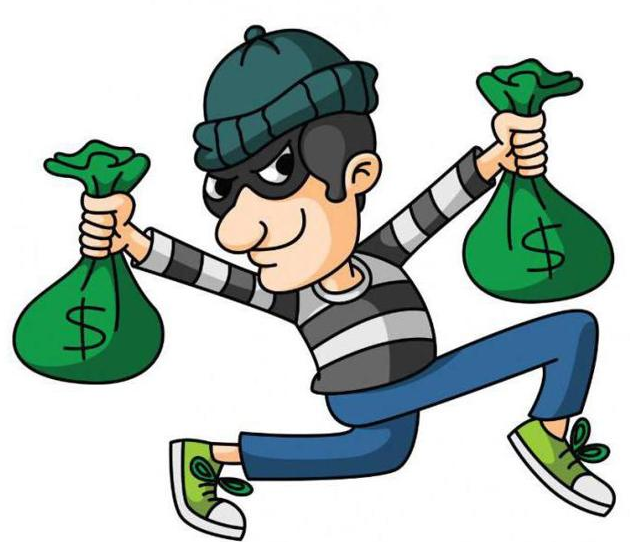